In [51]:
import pandas as pd
import numpy as np

def process_file(file_path, currency):
    df = pd.read_csv(file_path)
    
    # convert date columns to dd-mm-yyyy format
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d-%m-%Y')
    df.set_index('Date', inplace=True)
    
    # columns to be kept
    columns_to_keep = ['Close']

    # converts numbers to floating point and removes commas
    for col in columns_to_keep:
        df[col] = df[col].replace(',', '', regex=True).astype(float)
    
    # add the currency as a suffix to the retained columns
    df = df[columns_to_keep]
    df.columns = [f"{col}_{currency}" for col in columns_to_keep]
    
    return df

file_paths = {
    'ETH-EUR.csv': 'ETH',
    'BTC-EUR.csv': 'BTC',
    'DOGE-EUR.csv': 'DOGE',
    'USDT-EUR.csv': 'USDT',
    'XRP-EUR.csv': 'XRP'
}

# place the adjusted data in the dictionary
dataframes = {}
for file, code in file_paths.items():
    df_processed = process_file(file, code)
    dataframes[code] = df_processed

# merge all data frames
combined_df = pd.concat(dataframes.values(), axis=1)

# define a function that cleans the data
def clean_data(df):
    
    # check for NaN and infinity values
    if df.isna().any().any() or np.isinf(df).any().any():
        
        # handle NaN values 
        df = df.ffill().bfill()
        
        # handle infinity values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

df_clean = clean_data(combined_df)
print(df_clean.head())

            Close_ETH  Close_BTC  Close_DOGE  Close_USDT  Close_XRP
Date                                                               
04-12-2023    2061.30    39728.0    0.082351      0.9225     0.5759
03-12-2023    2007.32    37994.0    0.078228      0.9191     0.5726
02-12-2023    1992.83    37965.0    0.079103      0.9193     0.5718
01-12-2023    1922.37    37353.0    0.076899      0.9194     0.5629
30-11-2023    1880.00    36662.0    0.076479      0.9190     0.5578


In [52]:
## Test 1 Pearson Correlation Coefficient

"""
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import pearsonr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = pearsonr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Pearson Correlation Coefficient = 0.8988, p-value = 0.0000
ETH has a significant correlation with DOGE: Pearson Correlation Coefficient = 0.8682, p-value = 0.0000
ETH has a significant correlation with USDT: Pearson Correlation Coefficient = -0.5779, p-value = 0.0000
ETH has a significant correlation with XRP: Pearson Correlation Coefficient = 0.8414, p-value = 0.0000


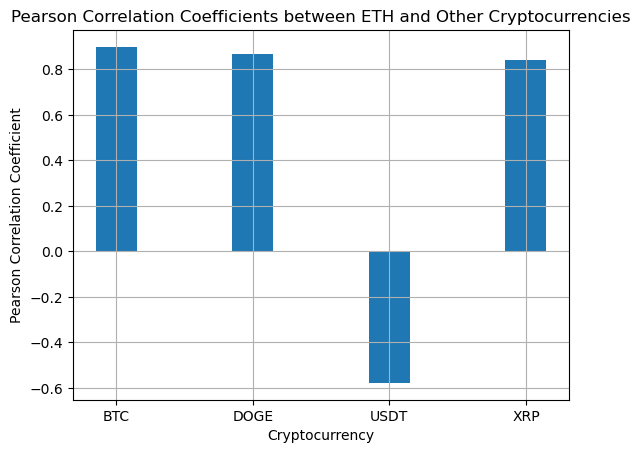

In [54]:
import matplotlib.pyplot as plt

# plot the graph
plt.bar(correlations.keys(), correlations.values(), width=0.3) 
plt.title('Pearson Correlation Coefficients between ETH and Other Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

In [55]:
## Spearman's Rank Correlation Coefficient

from scipy.stats import spearmanr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = spearmanr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Spearman Correlation Coefficient = 0.9174, p-value = 0.0000
ETH has a significant correlation with DOGE: Spearman Correlation Coefficient = 0.5877, p-value = 0.0000
ETH has a significant correlation with USDT: Spearman Correlation Coefficient = -0.6535, p-value = 0.0000
ETH has a significant correlation with XRP: Spearman Correlation Coefficient = 0.7499, p-value = 0.0000


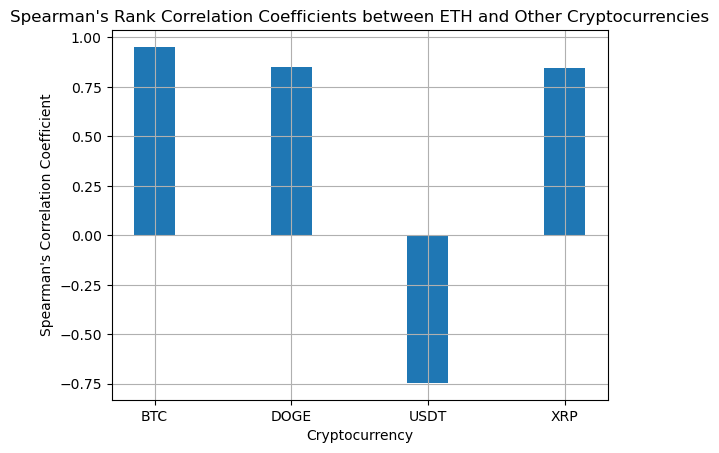

In [90]:
import matplotlib.pyplot as plt

# plot the graph

plt.bar(correlations.keys(), correlations.values(), width=0.3) 
plt.title("Spearman's Rank Correlation Coefficients between ETH and Other Cryptocurrencies")
plt.xlabel('Cryptocurrency')
plt.ylabel("Spearman's Correlation Coefficient")
plt.grid(True)
plt.show()

In [56]:
## Use Augmented Dickey-Fuller (ADF) to test for time series stationarity
## Because the time series is not stationary, we need to perform a differencing operation on the data

import pandas as pd
from statsmodels.tsa.stattools import adfuller

columns = ['Close_ETH', 'Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']

# create a DataFrame to store the differenced series
diff_df = pd.DataFrame()

for column in columns:
    
    # first-order differencing of time series
    diff_series = df_clean[column].diff().dropna()
    
    # add differenced series to the df
    diff_df[column] = diff_series
   
    adf_result = adfuller(diff_series)

    print(f"Results for {column}:")
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    
    # test if time series are stationary by checking if the p value is less than 0.05
    if adf_result[1] < 0.05:
        print(f"The time series of {column} is stationary after differencing.\n")
    else:
        print(f"The time series of {column} is not stationary after differencing.\n") 
    print("\n" + "-"*50 + "\n")

Results for Close_ETH:
ADF Statistic: -14.038293
p-value: 0.000000
The time series of Close_ETH is stationary after differencing.


--------------------------------------------------

Results for Close_BTC:
ADF Statistic: -5.217641
p-value: 0.000008
The time series of Close_BTC is stationary after differencing.


--------------------------------------------------

Results for Close_DOGE:
ADF Statistic: -8.298142
p-value: 0.000000
The time series of Close_DOGE is stationary after differencing.


--------------------------------------------------

Results for Close_USDT:
ADF Statistic: -15.595721
p-value: 0.000000
The time series of Close_USDT is stationary after differencing.


--------------------------------------------------

Results for Close_XRP:
ADF Statistic: -30.395303
p-value: 0.000000
The time series of Close_XRP is stationary after differencing.


--------------------------------------------------



In [61]:
## SARIMA model
import numpy as np
import pandas as pd
from pmdarima import auto_arima

np.random.seed(0)

endog = df_clean['Close_ETH']  
exog = df_clean[['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']]  

# Automatic selection of model parameters using auto_arima
model = auto_arima(
    endog,
    exogenous=exog,
    seasonal=True,   # Enable seasonal differencing
    m=12,            # Seasonal period
    trace=True,      
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True    # Use the stepwise algorithm
)

# Print the summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8208.822, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8212.157, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8214.330, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8214.532, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8211.032, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=8207.106, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=8207.651, Time=4.02 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=8207.105, Time=1.60 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=8205.140, Time=5.30 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=8200.391, Time=5.96 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=8204.619, Time=4.93 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=8207.133, Time=4.68 sec
 ARIMA(2,1,1)(2,0,2)[12] inte

In [62]:
# Splitting the data
split_point = int(len(df_clean) * 0.8)
train_endog = endog[:split_point]
train_exog = exog.iloc[:split_point]
valid_endog = endog[split_point:]
valid_exog = exog.iloc[split_point:]

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


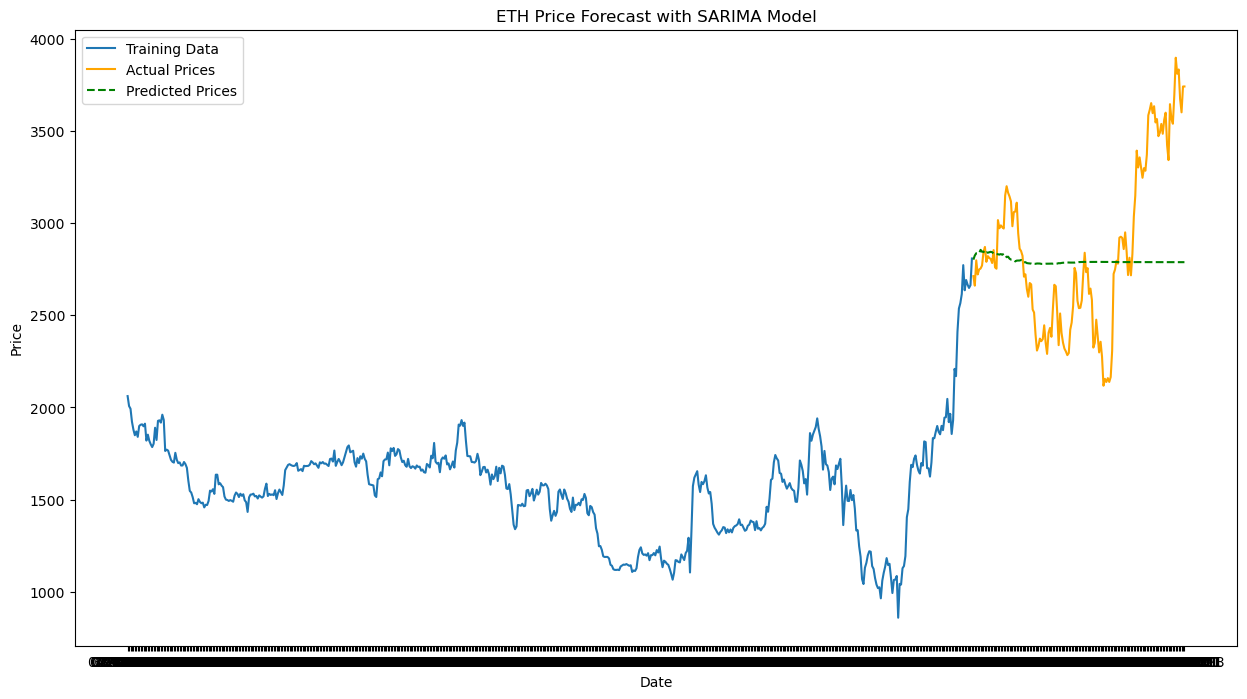

In [68]:
# Drop rows with NaN values 
valid_exog = valid_exog.dropna()

# Fit the SARIMA model to the training data
model.fit(train_endog, exogenous=train_exog)

# Make predictions for the validation period
predictions = model.predict(n_periods=len(valid_endog), exogenous=valid_exog)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_endog.index, train_endog, label='Training Data')
plt.plot(valid_endog.index, valid_endog, label='Actual Prices', color='orange')
plt.plot(valid_endog.index, predictions, label='Predicted Prices', color='green', linestyle='--')

plt.title('ETH Price Forecast with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [176]:
## VAR model

from statsmodels.tsa.api import VAR

# create a VAR model and ensure that there are no NaN values.
model = VAR(diff_df)

# evaluate each of the possible lag orders (from 1 to 30) 
selected_orders = model.select_order(30)  
print(selected_orders.summary())

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -8.142     -8.109*   0.0002911     -8.129*
1      -8.180*      -7.985  0.0002803*      -8.104
2       -8.176      -7.819   0.0002814      -8.038
3       -8.165      -7.646   0.0002843      -7.965
4       -8.133      -7.451   0.0002938      -7.869
5       -8.123      -7.279   0.0002967      -7.797
6       -8.144      -7.137   0.0002905      -7.755
7       -8.138      -6.969   0.0002924      -7.686
8       -8.091      -6.760   0.0003065      -7.576
9       -8.090      -6.596   0.0003069      -7.513
10      -8.065      -6.409   0.0003147      -7.425
11      -8.062      -6.244   0.0003157      -7.359
12      -8.048      -6.067   0.0003205      -7.282
13      -7.999      -5.856   0.0003367      -7.171
14      -7.976      -5.671   0.0003447      -7.085
15      -7.938      -5.470   0.0003586      -6.984
16      -7.911      -5.280   0.

In [169]:
## Johansen’s Test: 

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def johansen_test(data, det_order=-1, k_ar_diff=1):
    """
    Define a function that runs Johansen's Test.
    
    The det_order parameter determines the type of deterministic trend in the test:
    A value of '-1' means that no deterministic component is included in the model, 
    i.e., there are no constant or trend terms.
    A value of '0' represents a model that includes a constant term, but no linear trend term.
    A value of '1' represents a model that includes both a constant term and a linear trend term.
    
    The information criterion recommends the use of order 0 hysteresis.
    This means that the model considers the current value to be unaffected by its own past values.
    We still chose a lag order (1st order) to experiment with for practical reasons.
    
    """
    test_result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    return test_result

for code in file_paths.values():
    
    # exclude the ETH column
    if code != 'ETH': 

        # create df with the ETH and the other cryptocurrency
        pair_columns = [f'Close_ETH', f'Close_{code}']
        
        # drop missing values
        pair_df = combined_df[pair_columns].dropna()  

        print(f"Testing cointegration between ETH and {code}:")
        johansen_test_results = johansen_test(pair_df)

        # display the results 
        
        # Eigenvalues are used to determine the strength of the covariance between variables.
        print("Eigenvalues:", johansen_test_results.eig)
        
        # Trace Statistics tests for the existence of a cointegration relationship.
        print("Trace Statistics:", johansen_test_results.lr1)
        print("Critical Values (Trace):", johansen_test_results.cvt)
        
        # Max-Eigen Statistics is used to test the statistics of cointegration relationship.
        print("Max-Eigen Statistics:", johansen_test_results.lr2)
        print("Critical Values (Max-Eigen):", johansen_test_results.cvm)

        # conclusions
        
        # extract the first value of the trace statistic and the corresponding critical value
        trace_stat, crit_value_trace = johansen_test_results.lr1[0], johansen_test_results.cvt[0, 1]
        
        # extract the first value of the maximum eigenroot statistic and the corresponding critical value
        max_stat, crit_value_max = johansen_test_results.lr2[0], johansen_test_results.cvm[0, 1]
        
        # if trace_stat is greater than crit_value_trace and max_stat is greater than crit_value_max, then there is a cointegration relationship
        if trace_stat > crit_value_trace and max_stat > crit_value_max:
            print(f"Cointegration exists: There is a significant market value correlation between ETH and {code}")
        else:
            print(f"No cointegration: There is no significant market value correlation between ETH and {code}")

        print("\n" + "-"*50 + "\n")


Testing cointegration between ETH and BTC:
Eigenvalues: [0.01328616 0.00131365]
Trace Statistics: [10.70881189  0.95828365]
Critical Values (Trace): [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Max-Eigen Statistics: [9.75052824 0.95828365]
Critical Values (Max-Eigen): [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
No cointegration: There is no significant market value correlation between ETH and BTC

--------------------------------------------------

Testing cointegration between ETH and DOGE:
Eigenvalues: [0.01522912 0.00131295]
Trace Statistics: [12.14519841  0.95776829]
Critical Values (Trace): [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Max-Eigen Statistics: [11.18743012  0.95776829]
Critical Values (Max-Eigen): [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
No cointegration: There is no significant market value correlation between ETH and DOGE

--------------------------------------------------

Testing cointegration between ETH and USDT:
Eige

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:              Close_ETH   No. Observations:                  731
Model:                     AutoReg(1)   Log Likelihood               -4098.498
Method:               Conditional MLE   S.D. of innovations             66.383
Date:                Wed, 13 Dec 2023   AIC                           8202.996
Time:                        10:53:31   BIC                           8216.775
Sample:                             1   HQIC                          8208.312
                                  731                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3343      2.458      0.950      0.342      -2.484       7.153
Close_ETH.L1     0.0171      0.037      0.462      0.644      -0.055       0.090
                                    Roots   

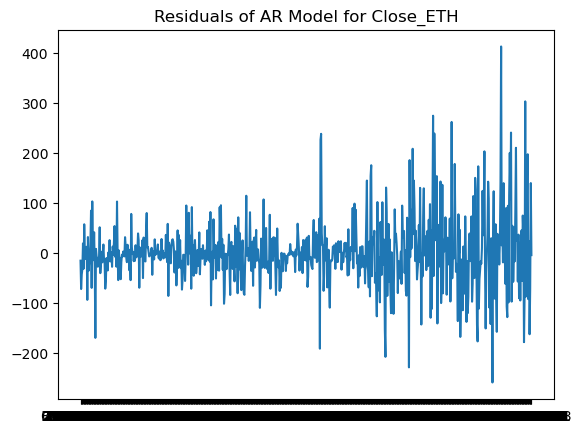

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:              Close_BTC   No. Observations:                  731
Model:                     AutoReg(1)   Log Likelihood               -6152.555
Method:               Conditional MLE   S.D. of innovations           1106.790
Date:                Wed, 13 Dec 2023   AIC                          12311.110
Time:                        10:53:36   BIC                          12324.889
Sample:                             1   HQIC                         12316.426
                                  731                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.4233     40.968     -0.328      0.743     -93.718      66.872
Close_BTC.L1    -0.1949      0.050     -3.876      0.000      -0.293      -0.096
                                    Roots   

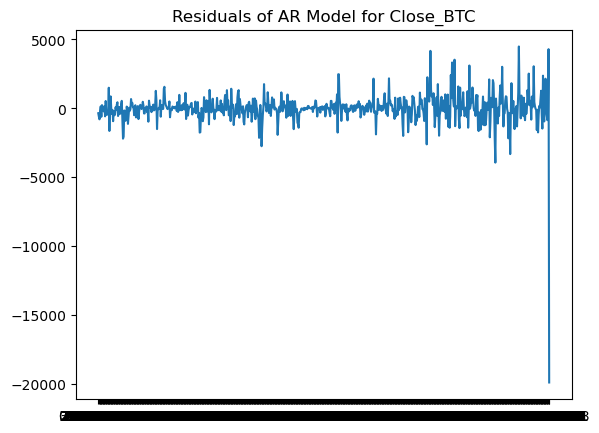

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:             Close_DOGE   No. Observations:                  731
Model:                     AutoReg(1)   Log Likelihood                2910.574
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 13 Dec 2023   AIC                          -5815.148
Time:                        10:53:40   BIC                          -5801.369
Sample:                             1   HQIC                         -5809.832
                                  731                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.000      0.894      0.371      -0.000       0.000
Close_DOGE.L1    -0.0931      0.037     -2.527      0.011      -0.165      -0.021
                                    Root

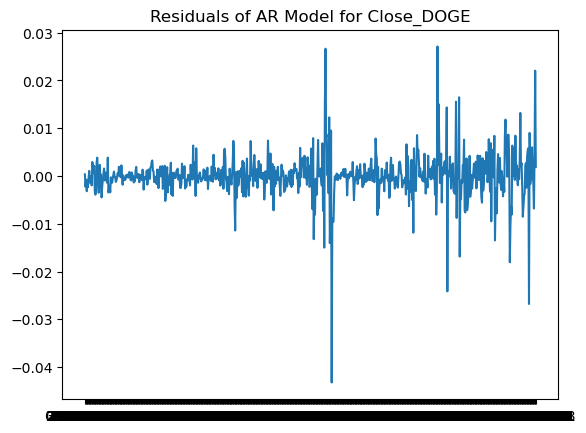

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:             Close_USDT   No. Observations:                  731
Model:                     AutoReg(1)   Log Likelihood                2911.020
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 13 Dec 2023   AIC                          -5816.040
Time:                        10:53:43   BIC                          -5802.261
Sample:                             1   HQIC                         -5810.724
                                  731                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.635e-05      0.000     -0.279      0.780      -0.000       0.000
Close_USDT.L1    -0.0371      0.037     -1.004      0.315      -0.110       0.035
                                    Root

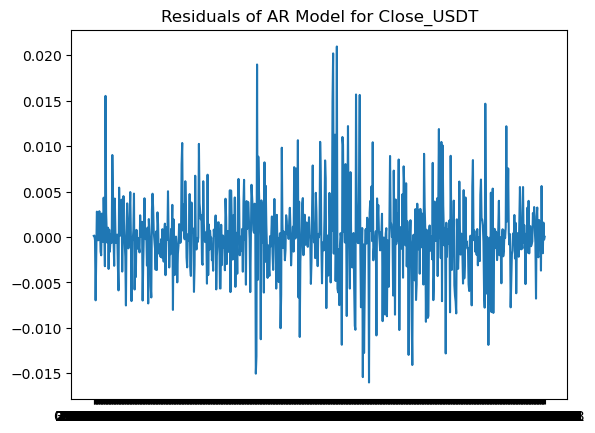

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:              Close_XRP   No. Observations:                  731
Model:                     AutoReg(1)   Log Likelihood                1733.651
Method:               Conditional MLE   S.D. of innovations              0.023
Date:                Wed, 13 Dec 2023   AIC                          -3461.303
Time:                        10:53:46   BIC                          -3447.524
Sample:                             1   HQIC                         -3455.987
                                  731                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.001      0.460      0.646      -0.001       0.002
Close_XRP.L1    -0.1186      0.037     -3.226      0.001      -0.191      -0.047
                                    Roots   

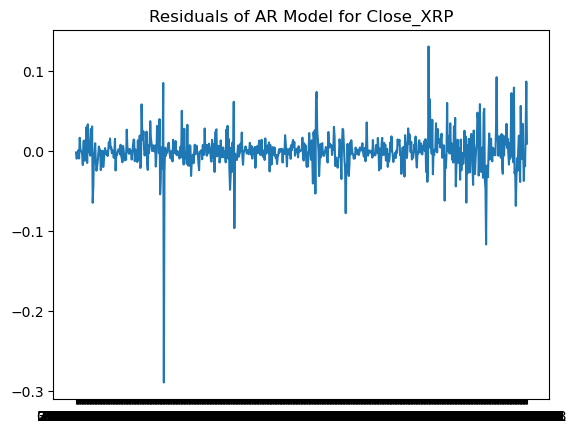

In [170]:
## AR model

from statsmodels.tsa.ar_model import AutoReg

residuals_df = pd.DataFrame()

for column in columns:
    series = diff_df[column]
    
    # fit the AR model using 1 as the lag order
    model = AutoReg(series, lags=1).fit()
    
    # extract the residuals
    residuals_df[column] = model.resid
    
    print(model.summary())
    
    # plot the residuals
    plt.figure()
    plt.plot(model.resid)
    plt.title(f"Residuals of AR Model for {column}")
    plt.show()

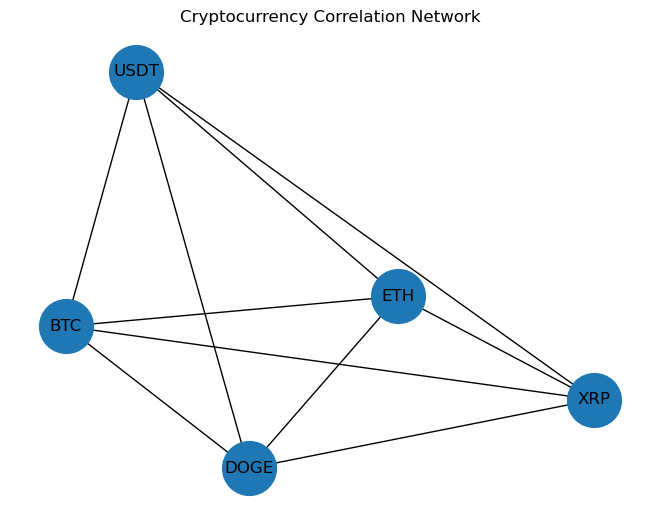

In [171]:
## Network Building

import networkx as nx

# calculate the matrix of correlation coefficients
correlation_matrix = residuals_df.corr()

G = nx.Graph()
codes = list(dataframes.keys())

node_names = [column.replace('Close_', '') for column in columns]
for name in node_names:
    G.add_node(name)
     
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        correlation = correlation_matrix.loc[column1, column2]
        if not pd.isnull(correlation):
            G.add_edge(node_names[i], node_names[j], weight=abs(correlation))

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=1500)
plt.title("Cryptocurrency Correlation Network")
plt.show()

In [173]:
## Test 2 Cross-correlation test
# We use the differenced stationary dataset for cross-correlation in time series analysis

import numpy as np
from scipy import signal

eth_column = diff_df['Close_ETH']
currencies = ['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']

for currency in currencies:
    other_column = diff_df[currency]
    
    # calculate the cross correlation
    correlation = signal.correlate(eth_column, other_column, mode="full")
   
    # calculate the time lag
    lags = signal.correlation_lags(eth_column.size, other_column.size, mode="full")
    
    # find the maximum correlation lag
    max_corr_lag = lags[np.argmax(correlation)]
    
    print(f"Max correlation lag between ETH and {code}: {max_corr_lag}")

Max correlation lag between ETH and XRP: 0
Max correlation lag between ETH and XRP: 0
Max correlation lag between ETH and XRP: 77
Max correlation lag between ETH and XRP: 0
